In [4]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

In [5]:
def get_splits(n_samples, n_splits):
    sample_idx = np.arange(n_samples)
    np.random.shuffle(sample_idx)
    split_idx = np.zeros(n_samples)
    for i in range(n_samples//n_splits, 
                   n_samples - n_samples%n_splits, 
                   n_samples//n_splits):
        split_idx[i:] += 1
    res = np.ones(shape=(n_splits, n_samples), dtype=bool) 
    for n in range(n_splits):
        res[n, sample_idx[split_idx==n]] = False
    return res


In [6]:
data = load_breast_cancer()
X, X_test, y, y_test = train_test_split(data.data, data.target, test_size=0.15) 

In [69]:


all_k = list(range(1, 20))
n_folds = 5
def cross_validate(X, y, n_folds):
    per_split_masks = get_splits(X.shape[0], n_folds)
    results = np.zeros(shape=(len(all_k), n_folds))
    for k_idx, k in enumerate(all_k):
        for split_id, mask in enumerate(per_split_masks):
            x_train = X[mask]
            y_train = y[mask]
            x_val = X[~mask]
            y_val = y[~mask]
            classifier = KNeighborsClassifier(n_neighbors=k)
            classifier.fit(x_train,y_train)
            scores = classifier.predict_proba(x_val)
            results[k_idx][split_id] = roc_auc_score(y_val, scores[:,1])
    return results

In [67]:
best_k = all_k[results.mean(axis=1).argmax()]
best_k

17

In [10]:
last_classifier = KNeighborsClassifier(n_neighbors=best_k)
last_classifier.fit(X, y)

KNeighborsClassifier(n_neighbors=19)

In [11]:
y_score = last_classifier.predict_proba(X_test)
print(roc_auc_score(y_test, y_score[:,1]))

0.9444444444444444


Which mean would be the best to take? A mean improves with the amount of data points it has, so taking the mean of the entire breast cancer data set, and then using that in the cross validation is more accurate.

In [85]:
mean_of_data = X.mean(axis=0)
std_of_data = X.std(axis=0)
scaled_data = (X.data - mean_of_data) / std_of_data
scaled_scores = cross_validate(scaled_data, y, 5)
fully_scaled_score = scaled_scores.mean(axis=1)


Text(0, 0.5, 'roc auc (5 folds)')

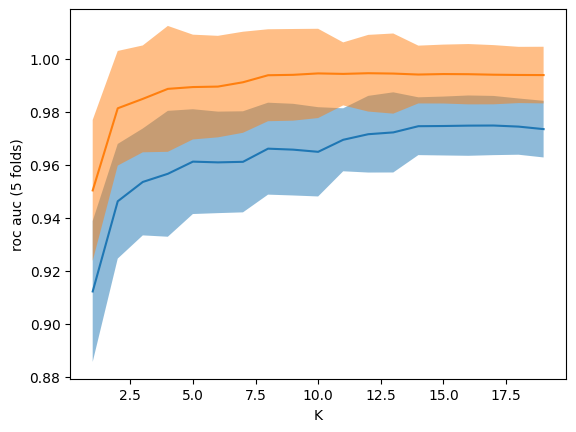

In [87]:
import matplotlib.pyplot as plt

means= results.mean(axis=1)
stds = results.std(axis=1)
plt.plot(all_k, means)
plt.plot(all_k, fully_scaled_score)
plt.fill_between(all_k, means - stds, means + stds, alpha=0.5)
plt.fill_between(all_k, fully_scaled_score - stds, fully_scaled_score + stds, alpha=0.5)
plt.xlabel("K")
plt.ylabel("roc auc (5 folds)")


In [ ]:
f = plt.figure
plt.plot(scaled_data, roc_scores, color='blue')
plt.xlabel('Data')
plt.ylabel('ROC AUC Scores')